In [41]:
import json

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme()


In [42]:
import os
import sys
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt

def get_eval_results(file, field):
    eval_returns = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == field:
                eval_returns.append(v.simple_value)
    return np.array(eval_returns)

def graph_lines(files, figsize=(10,8), style=''):
    fields = ['episode', 'return_mean', 'return_std']
    data = [[] for i in range(len(files))]
    size = []
    for i in range(len(fields)):
        for j in range(len(files)):
            results = get_eval_results(files[j], fields[i])
            if i == 0:
                size.append(len(results))
            data[j].append(results[:size[j]])
    
    data = [np.array(d) for d in data]
    data[2] = data[2][:, :130]
    for d in data:
        print(d.shape)
    
    plt.figure(figsize=figsize)
    for i in range(len(data)):
        plt.plot(data[i][0], data[i][1], style, linewidth=3.0)
        if len(data[i]) > 2:
            plt.fill_between(data[i][0], data[i][1] - data[i][2], data[i][1] + data[i][2], alpha=.3)
    return data

(3, 197)
(3, 196)
(3, 130)


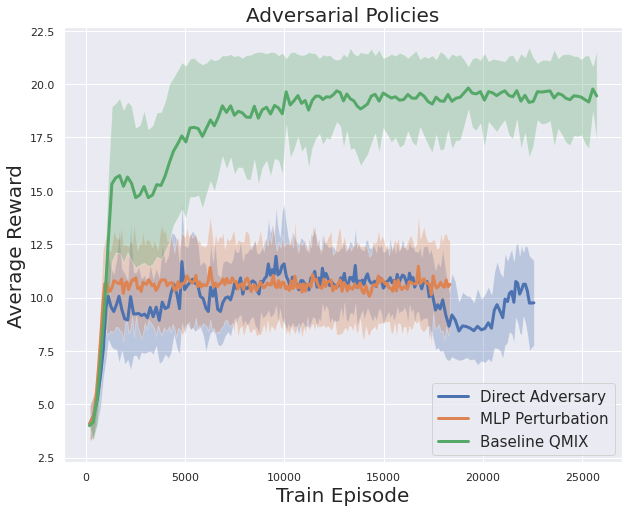

In [43]:
data = ['/home/ashwin/CollegeWork/CS285/adverserial-cooperation/pymarl/results/tb_logs/adv_dqn__2020-12-16_05-56-19/events.out.tfevents.1608098179.33767ce00e76',
       '/home/ashwin/CollegeWork/CS285/adverserial-cooperation/pymarl/results/tb_logs/adv_dqn_gen_working/events.out.tfevents.1608057452.5ea5071b4932',
       '/home/ashwin/CollegeWork/CS285/adverserial-cooperation/pymarl/results/tb_logs/qmix__2020-12-13_01-08-22/events.out.tfevents.1607821702.210402733cd0']


graph_lines(data)

plt.title("Adversarial Policies", fontsize=20)
plt.xlabel("Train Episode", fontsize=20)
plt.ylabel("Average Reward", fontsize=20)
plt.legend(["Direct Adversary", "MLP Perturbation", "Baseline QMIX"], fontsize=15)
plt.show()


In [31]:
def graph_lines(files, figsize=(10,8), style=''):
    fields = ['episode', 'battle_won_mean']
    data = [[] for i in range(len(files))]
    size = []
    for i in range(len(fields)):
        for j in range(len(files)):
            results = get_eval_results(files[j], fields[i])
            if i == 0:
                size.append(len(results))
            data[j].append(results[:size[j]])
    
    data = [np.array(d) for d in data]
    data[2] = data[2][:, :130]
    for d in data:
        print(d.shape)
    
    plt.figure(figsize=figsize)
    for i in range(len(data)):
        plt.plot(data[i][0], data[i][1], style, linewidth=3.0)
        if len(data[i]) > 2:
            plt.fill_between(data[i][0], data[i][1] - data[i][2], 0, alpha=0)
    return data

(2, 197)
(2, 196)
(2, 130)


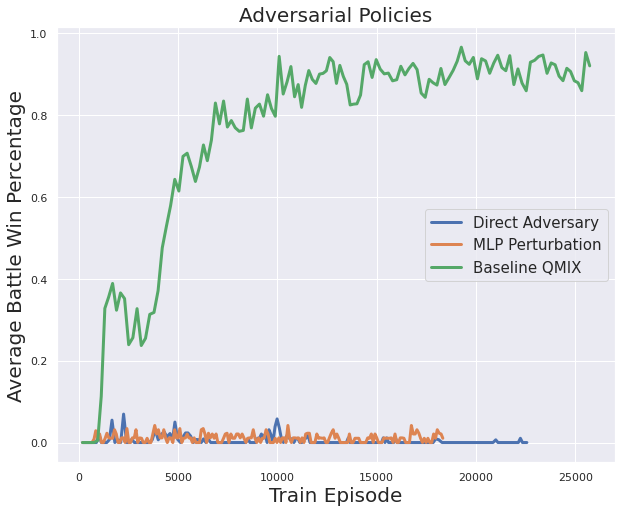

In [33]:
data = ['/home/ashwin/CollegeWork/CS285/adverserial-cooperation/pymarl/results/tb_logs/adv_dqn__2020-12-16_05-56-19/events.out.tfevents.1608098179.33767ce00e76',
       '/home/ashwin/CollegeWork/CS285/adverserial-cooperation/pymarl/results/tb_logs/adv_dqn_gen_working/events.out.tfevents.1608057452.5ea5071b4932',
       '/home/ashwin/CollegeWork/CS285/adverserial-cooperation/pymarl/results/tb_logs/qmix__2020-12-13_01-08-22/events.out.tfevents.1607821702.210402733cd0']

graph_lines(data)

plt.title("Adversarial Policies", fontsize=20)
plt.xlabel("Train Episode", fontsize=20)
plt.ylabel("Average Battle Win Percentage", fontsize=20)
plt.legend(["Direct Adversary", "MLP Perturbation", "Baseline QMIX"], fontsize=15)
plt.show()


In [51]:
def graph_lines(files, figsize=(10,8), style=''):
    fields = ['episode', 'return_mean', 'return_std']
    data = [[] for i in range(len(files))]
    size = []
    for i in range(len(fields)):
        for j in range(len(files)):
            results = get_eval_results(files[j], fields[i])
            if i == 0:
                size.append(len(results))
            data[j].append(results[:size[j]])
    
    data = [np.array(d) for d in data]
    for d in data:
        print(d.shape)
    
    plt.figure(figsize=figsize)
    for i in range(len(data)):
        plt.plot(data[i][0], data[i][1], style, linewidth=3.0)
        if len(data[i]) > 2:
            plt.fill_between(data[i][0], data[i][1] - data[i][2], data[i][1] + data[i][2], alpha=.3)
    return data

(3, 200)
(3, 204)


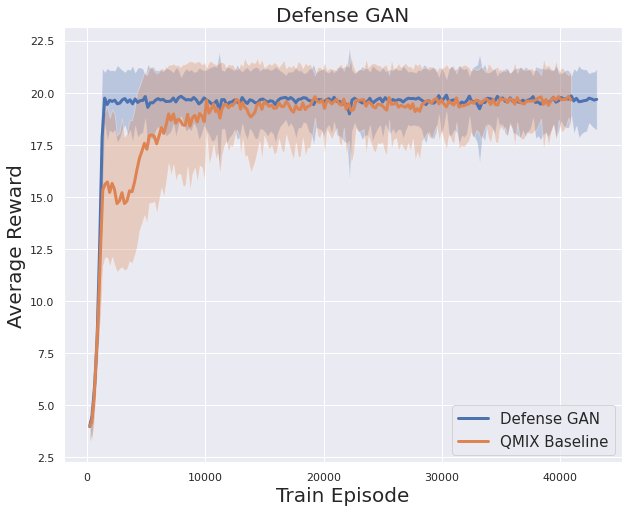

In [52]:
data = ['/home/ashwin/CollegeWork/CS285/adverserial-cooperation/pymarl/results/tb_logs/def_gan_working/events.out.tfevents.1608168780.1fbaf8881dee', '/home/ashwin/CollegeWork/CS285/adverserial-cooperation/pymarl/results/tb_logs/qmix__2020-12-13_01-08-22/events.out.tfevents.1607821702.210402733cd0']

graph_lines(data)

plt.title("Defense GAN", fontsize=20)
plt.xlabel("Train Episode", fontsize=20)
plt.ylabel("Average Reward", fontsize=20)
plt.legend(["Defense GAN", "QMIX Baseline"], loc="lower right", fontsize=15)
plt.show()
